Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

    What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

    Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

    Evaluate your in-sample results using the model score, confusion matrix, and classification report.

    Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

    Run through steps 2-4 using a different max_depth value.

    Which model performs better on your in-sample data?

    Which model performs best on your out-of-sample data, the validate set?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as acq
import prepare as prep

In [30]:
df = acq.get_titanic_data()

csv file found and read


In [31]:
df = prep.prep_titanic(df)

In [32]:
# For modeling I need to only have numbers for my values. sex and embarked have to go
df = df.drop(columns=['sex', 'embarked'])
df.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [33]:
train, validate, test = prep.split_function(df, 'survived')
train.head()

Prepared df: (891, 9)

Train: (534, 9)
Validate: (178, 9)
Test: (179, 9)


,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
577,1,1,1,0,55.9000,0,0,0,1
63,0,3,3,2,27.9000,0,1,0,1
424,0,3,1,1,20.2125,0,1,0,1
513,1,1,1,0,59.4000,0,0,0,0
610,0,3,1,5,31.2750,0,0,0,1


#### Explore

Based on previous exploration, we know we want to look at 
- sex

Priority 2:
- pclass and/or fare
- alone, sibsp, parch

Priority 3: 
- embarked


#### 0. split into features and target variable

    X will be our features
    y will be our target variable

Also, we want to establish a baseline prediction based on the max of survived.value_counts

In [34]:
# split train, validate, and test into features df (X) and target series (y)
# survived is first (0th) column, so I want everything after that
X_train = train.iloc[:,1:]
X_validate = validate.iloc[:,1:]
X_test = test.iloc[:,1:]

# target is survived
y_train = train.survived
y_validate = validate.survived
y_test = test.survived

In [36]:
y_train.value_counts()
# 329 died, 205 survived in train

# Set baseline accuracy
baseline_accuracy = y_train.value_counts().max() / y_train.count()

# another way : (train.survived == 0).mean()
baseline_accuracy

0.6161048689138576

#### 1. make the object

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree1 = DecisionTreeClassifier()

#### 2. fit the object
- First I will just send it all the features

In [45]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier()

#### 3. transform the object

In [46]:
tree1.score(X_train, y_train)

0.9307116104868914

In [41]:
from sklearn.tree import plot_tree

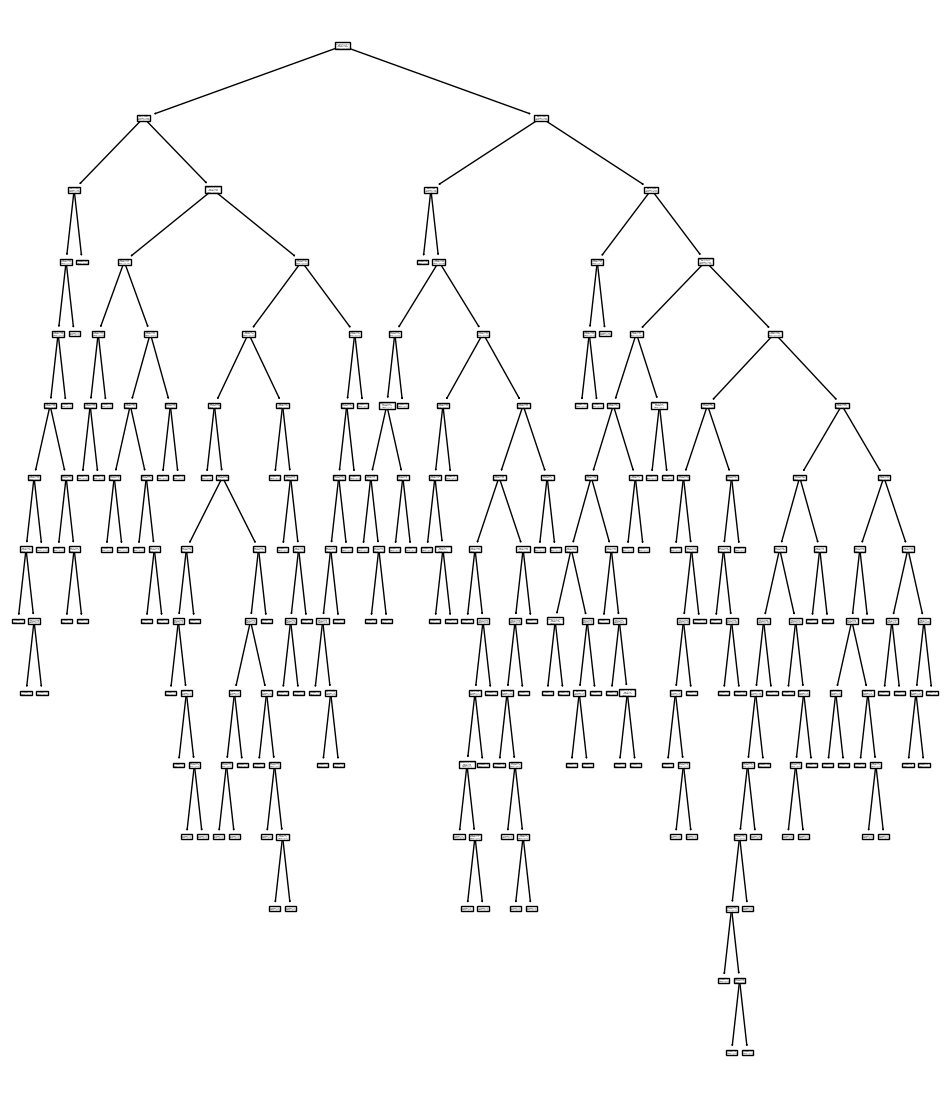

In [47]:
# let's look at the tree!
plt.figure(figsize=(12,14))
plot_tree(tree1,
         feature_names=X_train.columns
         )
plt.show()
# Whoa!

In [48]:
# I'm not going to transform this one very much, but I will check it on validate
tree1.score(X_validate, y_validate)

0.8258426966292135

### Repeat with a hyperparameter change
 1. make the object
 2. fit the object
 3. transform the object
 
 change max_depth=6

In [51]:
tree2 = DecisionTreeClassifier(max_depth=6)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [52]:
tree2.score(X_train, y_train)

0.8745318352059925

In [53]:
tree2.score(X_validate, y_validate)

0.8370786516853933

### Repeat with a features change
 1. make the object
 2. fit the object
 3. transform the object
 
 only send in sex (is_male)

In [84]:
features3 = ['sex_male']

In [57]:
tree3 = DecisionTreeClassifier()
tree3.fit(X_train[features3], y_train)

DecisionTreeClassifier()

In [58]:
tree3.score(X_train[features3], y_train)

0.7865168539325843

In [59]:
tree3.score(X_validate[features3], y_validate)

0.797752808988764

### Repeat with a features change
 1. make the object
 2. fit the object
 3. transform the object
 
sending in pclass, fare, alone, sex_male only

In [116]:
features4 = ['pclass', 'fare', 'alone', 'sex_male']

In [117]:
tree4 = DecisionTreeClassifier(max_depth=6)
tree4.fit(X_train[features4], y_train)

DecisionTreeClassifier(max_depth=6)

In [118]:
tree4.score(X_train[features4], y_train)

0.846441947565543

In [119]:
tree4.score(X_validate[features4], y_validate)

0.8426966292134831

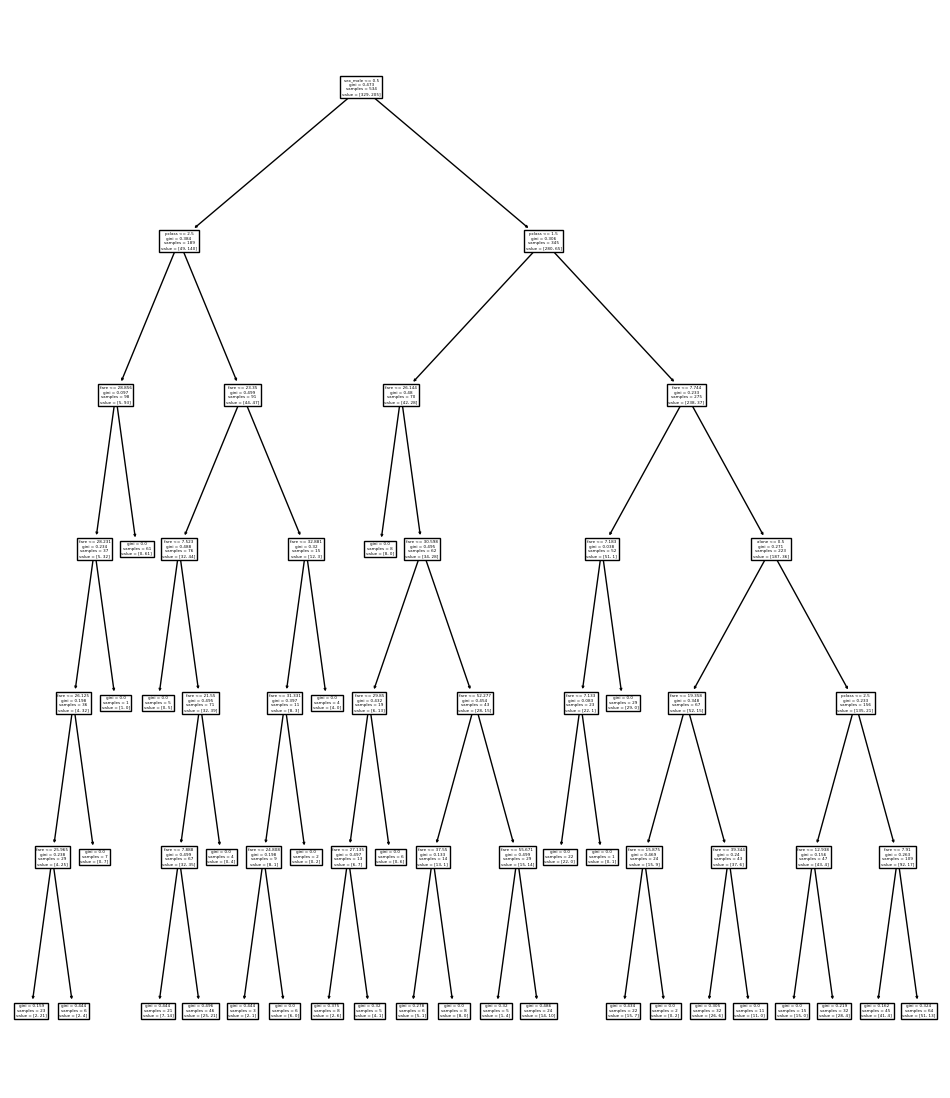

In [120]:
# let's look at the tree!
plt.figure(figsize=(12,14))
plot_tree(tree4,
         feature_names=X_train[features4].columns
         )
plt.show()

### Repeat with a features change
 1. make the object
 2. fit the object
 3. transform the object
 
sending in alone, sex_male only

In [86]:
features5 = ['alone', 'sex_male']
tree5 = DecisionTreeClassifier(max_depth=6)
tree5.fit(X_train[features5], y_train)

DecisionTreeClassifier(max_depth=6)

In [76]:
tree5.score(X_train[features5], y_train)

0.7865168539325843

In [77]:
tree5.score(X_validate[features], y_validate)

0.797752808988764

#### more evaluatiion
- tree2 and tree4 are interesting
- let's check confusion matrix, classification report for each

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
# defining a function to get metrics for a set of predictions vs a train series
def get_tree_metrics(y_train, y_pred):
    """
    This functiion will
    - take in a y_train series and a y_pred (result from a classifier.predict)
    - returns nothing
    - prints out confusion matrix with row/column labeled with actual/predicted and the unique values in y_train
    -- (could add in a labels variable to make that prettier (NOT THERE NOW))
    """
    print("CONFUSION MATRIX")
    print(pd.DataFrame(
          confusion_matrix(y_train, y_pred),
          index=[label.astype(str) + '_actual' for label in sorted(y_train.unique())],
          columns=[label.astype(str) + '_predicted' for label in sorted(y_train.unique())])
        )
    print()
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

In [88]:
y_pred2 = tree2.predict(X_train)

In [93]:
labels = sorted(y_train.unique())
labels = ['die', 'survive']
labels

['die', 'survive']

In [97]:
print(
pd.DataFrame(confusion_matrix(y_train, y_pred2),
            index=[label + '_actual' for label in labels],
            columns=[label + '_predicted' for label in labels])
)

                die_predicted  survive_predicted
die_actual                318                 11
survive_actual             56                149


In [96]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       329
           1       0.93      0.73      0.82       205

    accuracy                           0.87       534
   macro avg       0.89      0.85      0.86       534
weighted avg       0.88      0.87      0.87       534



In [121]:
# OR: 
y_pred2 = tree2.predict(X_train)
get_tree_metrics(y_train, y_pred2)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          318           11
1_actual           56          149

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       329
           1       0.93      0.73      0.82       205

    accuracy                           0.87       534
   macro avg       0.89      0.85      0.86       534
weighted avg       0.88      0.87      0.87       534



In [124]:
y_pred4 = tree4.predict(X_train[features4])
get_tree_metrics(y_train, y_pred4)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          315           14
1_actual           68          137

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       329
           1       0.91      0.67      0.77       205

    accuracy                           0.85       534
   macro avg       0.86      0.81      0.83       534
weighted avg       0.86      0.85      0.84       534



### Finish modeling

- Pick best model. I'm going with tree2 - all features, max_depth=6.
    - tree2 had the highest scores with minimal overfit (.87 train, .83 validate)


In [81]:
tree2.score(X_test, y_test)

0.7877094972067039

### Conclusion

- tree2 has a 79% accuracy on unseen data. This beats the baseline of 62%


### telco dataset - model exercises

- Acquire, Prepare

In [147]:
df = acq.get_telco_data()

csv file found and read


In [148]:
df = prep.prep_telco(df)

In [149]:
# getting rid of non-numeric columns to start the modeling phase
drop_cols = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service_type',
            'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
            'streaming_movies', 'contract_type', 'paperless_billing', 'payment_type', 'churn']
# make "encoded" df without only the encoded columns for machine learning
e_df = df.drop(columns=drop_cols)
# phone_service was included in multiple_lines, so drop that phone_service_encoded, too
e_df = e_df.drop(columns=['phone_service_encoded'])

In [161]:
mask = (e_df.internet_service_type_None == e_df['online_security_No internet service'])
mask.unique()

# So this should have been done in the explore phase. Since internet_service_type_None is repeated in 
# several columns, I can delete them. A possibly better way is to encode them differently so the column names
# will make more sense.  Later...
repeated_cols = ['online_security_No internet service', 'online_backup_No internet service',
                'device_protection_No internet service', 'tech_support_No internet service',
                'streaming_tv_No internet service', 'streaming_movies_No internet service']
e_df = e_df.drop(columns=repeated_cols)

In [165]:
train, validate, test = prep.split_function(e_df, 'churn_encoded')

Prepared df: (7043, 24)

Train: (4225, 24)
Validate: (1409, 24)
Test: (1409, 24)


### Explore
Based on previous exploration, we know we want to look at 


    - Priority 1: Look at monthly_charges, tenure, contract_type, payment_type, paperliss_billing

    - Priority 2: internet_service_type and tech_support
        - 2a: online_security, online_backup, device_protection

    - Priority 3: gender, partner, dependents

    - Priority 4: multiple lines, senior_citizen, streaming_tv

    - I don't plan to look at:
        - total_charges because it is related to tenure
        - phone_service because it is contained in multiple lines
        - streaming_movies because it is so similar to streaming_tv


#### 0. split into features and target variable

    X will be our features
    y will be our target variable

Also, we want to establish a baseline prediction based on the max of the target (aka churn)

In [167]:
# split train, validate, and test into features df (X) and target series (y)
# for the X df's, keep everything but the target (churn_encoded)
X_train = train.drop(columns=['churn_encoded'])
X_validate = validate.drop(columns=['churn_encoded'])
X_test = test.drop(columns=['churn_encoded'])

# target is churn_encoded
y_train = train.churn_encoded
y_validate = validate.churn_encoded
y_test = test.churn_encoded

In [168]:
X_train.head().T

## Don't forget baseline accuracy

,2332,5275,6429,89,6412
senior_citizen,0.00,0.0,0.00,1.00,0.00
tenure,12.00,1.0,59.00,27.00,54.00
monthly_charges,94.55,49.8,54.15,86.45,111.10
total_charges,1173.55,49.8,3116.15,2401.05,6014.85
gender_encoded,0.00,0.0,0.00,1.00,1.00
partner_encoded,0.00,0.0,0.00,0.00,0.00
dependendents_encoded,0.00,0.0,0.00,0.00,0.00
paperless_billing_encoded,0.00,1.0,0.00,1.00,0.00
multiple_lines_No phone service,0.00,0.0,0.00,0.00,0.00
multiple_lines_Yes,1.00,1.0,1.00,1.00,1.00
